

#### Dataset: [UCF101](https://www.crcv.ucf.edu/research/data-sets/ucf101/)

In [1]:
%matplotlib inline
import copy
import time
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import transforms,datasets, models

print(torch.__version__) 

1.11.0


In [2]:
# Check availability of GPU

use_gpu = torch.cuda.is_available()
# use_gpu = False # Uncomment in case of GPU memory error
if use_gpu:
    print('GPU is available!')
    device = "cuda"
    pinMem = True
else:
    print('GPU is not available!')
    device = "cpu"
    pinMem = False

GPU is available!


In [3]:
# Loading data from folder using ImageFolder
trainDir = 'train_5class'
valDir = 'test_5class'
apply_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor()])

BatchSize = 128
# Training dataloader
train_dataset = datasets.ImageFolder(trainDir,transform=apply_transform)
trainLoader = torch.utils.data.DataLoader(train_dataset, batch_size=BatchSize, shuffle=True,num_workers=4, pin_memory=pinMem)

# Test dataloader
test_dataset = datasets.ImageFolder(valDir,transform=apply_transform)
testLoader = torch.utils.data.DataLoader(test_dataset, batch_size=BatchSize, shuffle=False,num_workers=4, pin_memory=pinMem)

In [4]:
# Size of train and test datasets
print('No. of samples in train set: '+str(len(trainLoader.dataset)))
print('No. of samples in test set: '+str(len(testLoader.dataset)))

No. of samples in train set: 83403
No. of samples in test set: 19524


## Define network architecture

In [5]:
net = models.resnet18(pretrained=True)
print(net)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [6]:
# Counting number of trainable parameters
totalParams = 0
for name,params in net.named_parameters():
    print(name,'-->',params.size())
    totalParams += np.sum(np.prod(params.size()))
print('Total number of parameters: '+str(totalParams))

conv1.weight --> torch.Size([64, 3, 7, 7])
bn1.weight --> torch.Size([64])
bn1.bias --> torch.Size([64])
layer1.0.conv1.weight --> torch.Size([64, 64, 3, 3])
layer1.0.bn1.weight --> torch.Size([64])
layer1.0.bn1.bias --> torch.Size([64])
layer1.0.conv2.weight --> torch.Size([64, 64, 3, 3])
layer1.0.bn2.weight --> torch.Size([64])
layer1.0.bn2.bias --> torch.Size([64])
layer1.1.conv1.weight --> torch.Size([64, 64, 3, 3])
layer1.1.bn1.weight --> torch.Size([64])
layer1.1.bn1.bias --> torch.Size([64])
layer1.1.conv2.weight --> torch.Size([64, 64, 3, 3])
layer1.1.bn2.weight --> torch.Size([64])
layer1.1.bn2.bias --> torch.Size([64])
layer2.0.conv1.weight --> torch.Size([128, 64, 3, 3])
layer2.0.bn1.weight --> torch.Size([128])
layer2.0.bn1.bias --> torch.Size([128])
layer2.0.conv2.weight --> torch.Size([128, 128, 3, 3])
layer2.0.bn2.weight --> torch.Size([128])
layer2.0.bn2.bias --> torch.Size([128])
layer2.0.downsample.0.weight --> torch.Size([128, 64, 1, 1])
layer2.0.downsample.1.weight 

In [7]:
# Modifying the last fully-connected layer for 5 classes
net.fc = nn.Linear(512,5) 

In [8]:
net = net.to(device)

## Define loss function and optimizer

In [9]:
criterion = nn.NLLLoss() # Negative Log-likelihood
optimizer = optim.Adam(net.fc.parameters(), lr=1e-4) # Adam

## Train the network

Iteration: 1 /10;  Training Loss: 0.697900 ; Training Acc: 83.007
Iteration: 1 /10;  Testing Loss: 3.515148 ; Testing Acc: 84.091
Time consumed: 13m 28s
Iteration: 2 /10;  Training Loss: 0.259907 ; Training Acc: 96.457
Iteration: 2 /10;  Testing Loss: 1.532970 ; Testing Acc: 85.080
Time consumed: 8m 43s
Iteration: 3 /10;  Training Loss: 0.164511 ; Training Acc: 97.757
Iteration: 3 /10;  Testing Loss: 1.085781 ; Testing Acc: 85.387
Time consumed: 8m 43s
Iteration: 4 /10;  Training Loss: 0.120052 ; Training Acc: 98.303
Iteration: 4 /10;  Testing Loss: 0.877896 ; Testing Acc: 85.280
Time consumed: 8m 42s
Iteration: 5 /10;  Training Loss: 0.094095 ; Training Acc: 98.615
Iteration: 5 /10;  Testing Loss: 0.751102 ; Testing Acc: 85.438
Time consumed: 8m 42s
Iteration: 6 /10;  Training Loss: 0.077754 ; Training Acc: 98.800
Iteration: 6 /10;  Testing Loss: 0.688256 ; Testing Acc: 84.778
Time consumed: 8m 42s
Iteration: 7 /10;  Training Loss: 0.065166 ; Training Acc: 98.990
Iteration: 7 /10;  Te

KeyboardInterrupt: 

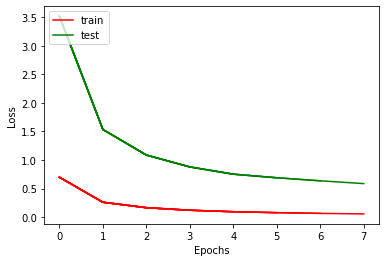

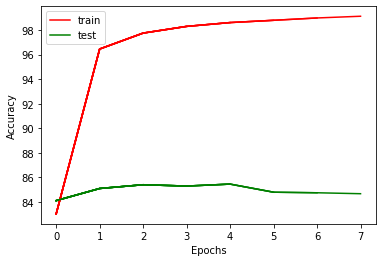

In [10]:
iterations = 10

trainLoss = []
trainAcc = []
testLoss = []
testAcc = []

start = time.time()
for epoch in range(iterations):
    epochStart = time.time()
    runningLoss = 0.0   
    avgTotalLoss = 0.0
    running_correct = 0   
    
    net.train() # For training 
    batchNum = 1
    for data in trainLoader:
        inputs,labels = data        
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        running_correct += (predicted == labels.data).sum()            
       
        # Initialize gradients to zero
        optimizer.zero_grad()             
        
        # Compute loss/error
        loss = criterion(F.log_softmax(outputs,dim=1), labels)
        # Backpropagate loss and compute gradients
        loss.backward()
        # Update the network parameters
        optimizer.step()
        # Accumulate loss per batch
        runningLoss += loss.item() 
        batchNum += 1

    avgTrainAcc = 100*float(running_correct)/float(len(trainLoader.dataset))
    avgTrainLoss = runningLoss/(float(len(trainLoader.dataset))/BatchSize)  
    trainAcc.append(avgTrainAcc)
    trainLoss.append(avgTrainLoss)  
    
    # Evaluating performance on test set for each epoch
    net.eval() # For testing [Affects batch-norm and dropout layers (if any)]
    running_correct = 0 
    with torch.no_grad():
        for data in testLoader:
            inputs,labels = data
            
            inputs, labels = inputs.to(device), labels.to(device)                
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            running_correct += (predicted == labels.data).sum()
        
            loss = criterion(F.log_softmax(outputs,dim=1), labels)
        
            runningLoss += loss.item()   

    avgTestLoss = runningLoss/(float(len(testLoader.dataset))/BatchSize)
    avgTestAcc = 100*float(running_correct)/float(len(testLoader.dataset))
    testAcc.append(avgTestAcc)  
    testLoss.append(avgTestLoss)
    
    # Plotting training loss vs Epochs
    fig1 = plt.figure(1)        
    plt.plot(range(epoch+1),trainLoss,'r-',label='train')  
    plt.plot(range(epoch+1),testLoss,'g-',label='test') 
    if epoch==0:
        plt.legend(loc='upper left')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')   
    # Plotting testing accuracy vs Epochs
    fig2 = plt.figure(2)        
    plt.plot(range(epoch+1),trainAcc,'r-',label='train')    
    plt.plot(range(epoch+1),testAcc,'g-',label='test')        
    if epoch==0:
        plt.legend(loc='upper left')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')  
          
        
    epochEnd = time.time()-epochStart
    print('Iteration: {:.0f} /{:.0f};  Training Loss: {:.6f} ; Training Acc: {:.3f}'\
          .format(epoch + 1,iterations,avgTrainLoss,avgTrainAcc))
    print('Iteration: {:.0f} /{:.0f};  Testing Loss: {:.6f} ; Testing Acc: {:.3f}'\
          .format(epoch + 1,iterations,avgTestLoss,avgTestAcc))
   
    print('Time consumed: {:.0f}m {:.0f}s'.format(epochEnd//60,epochEnd%60))
end = time.time()-start
print('Training completed in {:.0f}m {:.0f}s'.format(end//60,end%60))


### Save trained model

In [11]:
torch.save(net.state_dict(), 'resnet18Pre_fcOnly5class_ucf101_10adam_1e-4_b128.pt')